<a href="https://colab.research.google.com/github/siddharath28/Machine-learning/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Chrun project

First we import the nessecsaary Lib

In [ ]:
import pandas as pd #manipulation
import numpy as np  #numerical python
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots #visualization
import warnings
warnings.filterwarnings('ignore')

Importing the dataset


In [ ]:
df = pd.read_csv("customer_churn.csv")

In [ ]:
df.shape

(7043, 21)

shape of dataset is 7043*21

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


First we perform EDA

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Manipulation

In [ ]:
# prompt: Extract the 5th column and store it in ‘customer_5’

customer_5 = df.iloc[:, 4]


Extract all the male senior citizens whose payment method is electronic

In [ ]:
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]

In [ ]:
senior_male_electronic.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract        PaperlessBilling  PaymentMethod     MonthlyCharges  TotalCharges  Churn
0011-IGKFF  Male    1              Yes      No          13      Yes           No             Fiber optic      No              Yes           Yes               No           Yes          Yes              Month-to-month  Yes               Electronic check  98.00           1237.85       Yes      1
6892-XPFPU  Male    1              Yes      No          24      Yes           Yes            Fiber optic      No              Yes           Yes               No           Yes          Yes              Month-to-month  Yes               Electronic check  104.25          2433.9        Yes      1
6861-XWTWQ  Male    1              Yes      No          7       Yes           Yes            Fiber optic      No           

In [ ]:
print(senior_male_electronic.head())

    customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
20  8779-QRDMV   Male              1      No         No       1           No   
55  1658-BYGOY   Male              1      No         No      18          Yes   
57  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
78  0191-ZHSKZ   Male              1      No         No      30          Yes   
91  2424-WVHPL   Male              1      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
20  No phone service             DSL             No  ...              Yes   
55               Yes     Fiber optic             No  ...               No   
57               Yes     Fiber optic             No  ...              Yes   
78                No             DSL            Yes  ...               No   
91                No     Fiber optic             No  ...               No   

   TechSupport StreamingTV StreamingMovies        Contra

customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure

In [ ]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
print(customer_total_tenure.head())

    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
8   7892-POOKP  Female              0     Yes         No      28          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
8            Yes     Fiber optic             No  ...              Yes   
12           Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   
14            No     Fiber optic            Yes  ...              Yes   
15           Yes     Fiber optic            Yes  ...              Yes   

   TechSupport StreamingTV StreamingMovies        Contract PaperlessBillin

Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’

In [ ]:
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
print(two_mail_yes.head())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No internet service  Two year               No  M

● Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’

In [ ]:
customer_333 = df.sample(n=333, random_state =42)
print(customer_333.head())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
185   1024-GUALD  Female              0     Yes         No       1   
2715  0484-JPBRU    Male              0      No         No      41   
3825  3620-EHIMZ  Female              0     Yes        Yes      52   
1807  6910-HADCM  Female              0      No         No       1   
132   8587-XYZSF    Male              0      No         No      67   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
185            No  No phone service             DSL                   No  ...   
2715          Yes               Yes              No  No internet service  ...   
3825          Yes                No              No  No internet service  ...   
1807          Yes                No     Fiber optic                   No  ...   
132           Yes                No             DSL                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
185                  

Total Churn Counts

In [ ]:
churn_counts= df['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Data Visualization:
● Build a bar-plot for the ’InternetService’ column:
a. Set x-axis label to ‘Categories of Internet Service’
b. Set y-axis label to ‘Count of Categories’
c. Set the title of plot to be ‘Distribution of Internet Service’
d. Set the color of the bars to be ‘orange'

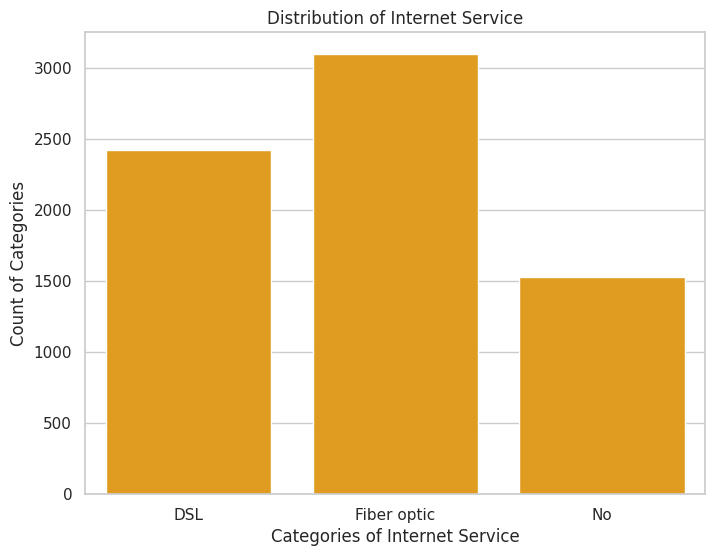

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=df, color='orange')


plt.xlabel('Categories of Internet Service')


plt.ylabel('Count of Categories')


plt.title('Distribution of Internet Service')


plt.show()

histogram for the ‘tenure’ column

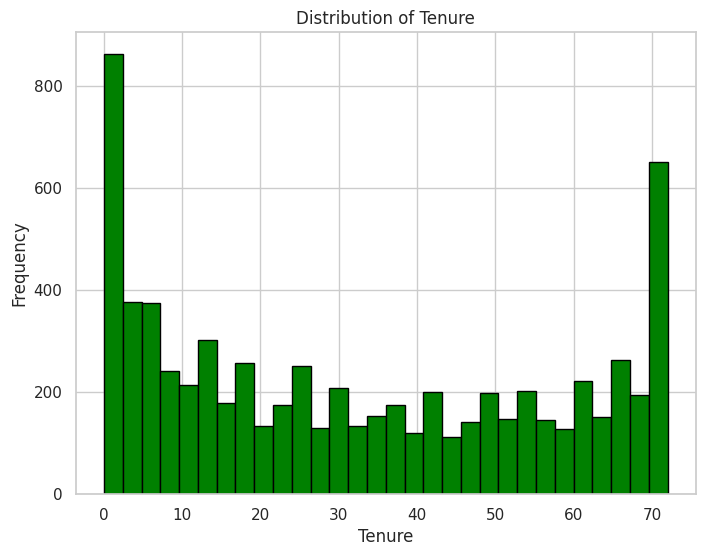

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=30, color='green', edgecolor='black')


plt.xlabel('Tenure')


plt.ylabel('Frequency')


plt.title('Distribution of Tenure')


plt.show()

Scatter-plot between ‘MonthlyCharges’ and ‘tenure’

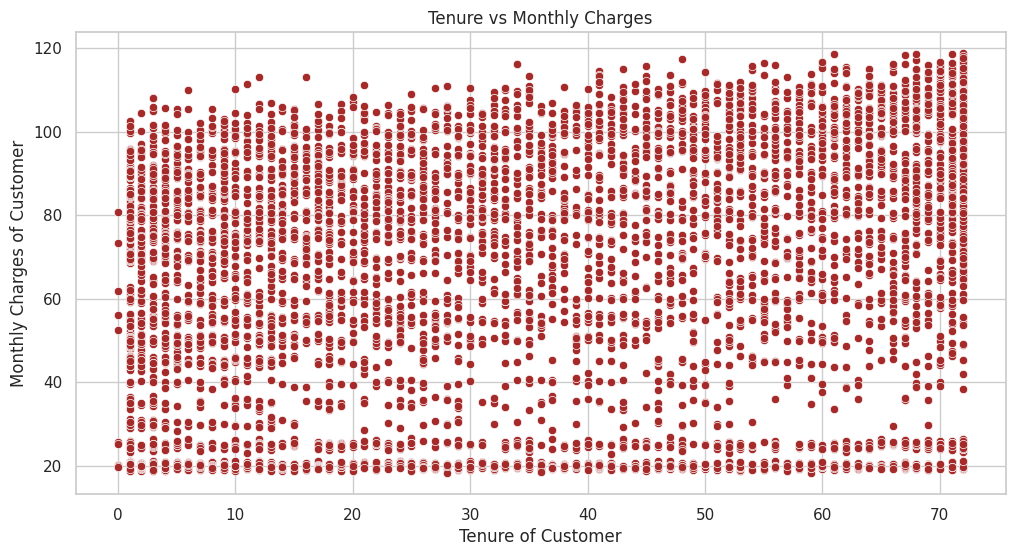

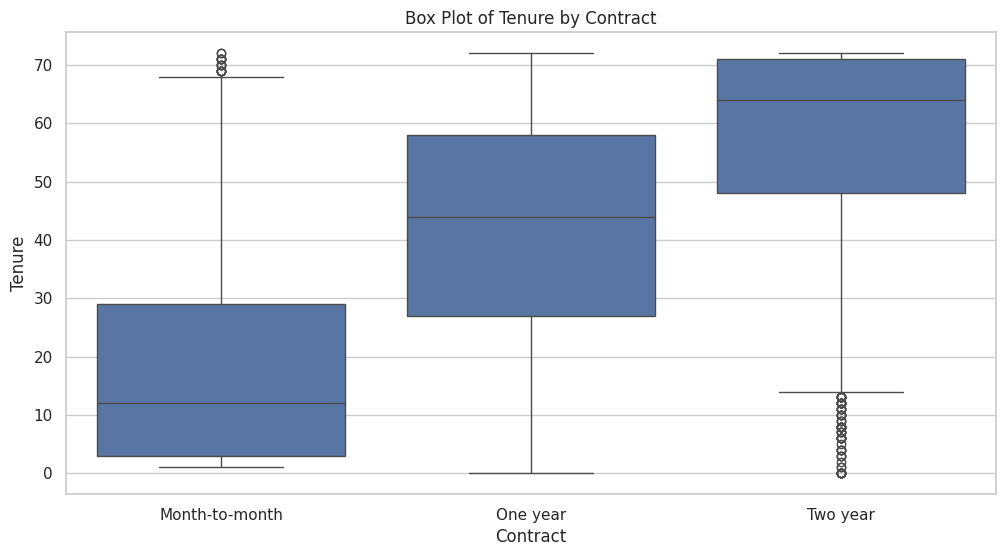

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, color='brown')


plt.xlabel('Tenure of Customer')


plt.ylabel('Monthly Charges of Customer')


plt.title('Tenure vs Monthly Charges')


plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='tenure', data=df)


plt.xlabel('Contract')


plt.ylabel('Tenure')


plt.title('Box Plot of Tenure by Contract')


plt.show()

 Linear Regression:
A simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

Filling the null value with mean

In [ ]:
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Finding RSME (Root Mean Square Error)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = df[['tenure']]
y = df['MonthlyCharges']

# Divide the dataset into train and test sets in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the linear regression model on the train set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

# Calculate the root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the RMSE
print("Root Mean Square Error (RMSE):", rmse)


Root Mean Square Error (RMSE): 29.07936015646814


In [ ]:
X = df[['tenure']]
y = df['MonthlyCharges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4930, 1)
Shape of X_test: (2113, 1)
Shape of y_train: (4930,)
Shape of y_test: (2113,)


In [ ]:
X = df[['tenure']]
y = df['MonthlyCharges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Predicted Values on Test Set:")
print(y_pred)

Predicted Values on Test Set:
[55.10659011 67.43520921 70.82557946 ... 73.29130328 60.96268418
 61.57911514]


In [ ]:
X = df[['tenure']]
y = df['MonthlyCharges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


errors = y_test - y_pred


print("Errors in Prediction:")
print(errors.head())

Errors in Prediction:
185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
Name: MonthlyCharges, dtype: float64


Logistic Regression:
● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df[['MonthlyCharges']]
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7352732434350603

Confusion Matrix:
 [[1036    0]
 [ 373    0]]

Classification Report:
               precision    recall  f1-score   support

          No       0.74      1.00      0.85      1036
         Yes       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



In [ ]:
X = df[['MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1036    0]
 [ 373    0]]

Accuracy Score: 0.7352732434350603


In [ ]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

# Divide the dataset into train and test sets in an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model on the train set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the values on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7977288857345636

Confusion Matrix:
 [[944  92]
 [193 180]]

Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



Decision Tree:
● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X = df[['tenure']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7572746628814763

Confusion Matrix:
 [[951  85]
 [257 116]]

Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.92      0.85      1036
         Yes       0.58      0.31      0.40       373

    accuracy                           0.76      1409
   macro avg       0.68      0.61      0.63      1409
weighted avg       0.73      0.76      0.73      1409



 Random Forest:
● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:

In [ ]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)


print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[1341  198]
 [ 308  266]]

Accuracy: 0.7605300520586843
